# Análise das hipóteses da pergunta 3

O primeiro passo para essa análise é o carregamento dos dados já obtidos e organizados nas fases iniciais de análise.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

redlist_df = pd.read_csv("../../clean-redlist.csv")

redlist_df

,Unnamed: 0,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude
0,0,Hexanchus griseus,Near Threatened,Decreasing,Marine,NaN,False,False,NaN,NaN
1,1,Heosemys annandalii,Critically Endangered,Decreasing,Terrestrial|Freshwater (=Inland waters),Indomalayan,False,False,NaN,NaN
2,2,Hubbsina turneri,Critically Endangered,Decreasing,Freshwater (=Inland waters),Neotropical,False,False,"[-101.4795, -101.7773, -101.7876]","[19.8745, 19.8256, 19.8273]"
3,3,Hungerfordia pelewensis,Endangered,Unknown,Terrestrial,Oceanian,False,False,NaN,NaN
4,4,Ictalurus mexicanus,Vulnerable,Unknown,Freshwater (=Inland waters),Neotropical,False,False,"[-99.35417, -99.3]","[21.98083, 22.0]"
...,...,...,...,...,...,...,...,...,...,...
50245,50245,Filicium thouarsianum,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,"[49.13333, 49.066667, 49.13333, 49.13333, 47.7...","[-18.81666, -18.866667, -18.81666, -18.81666, ..."
50246,50246,Melanophylla angustior,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[47.72611, 47.7322]","[-23.01306, -23.0219]"
50247,50247,Melanophylla madagascariensis,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.2001111, 49.20305, 49.20333, 49.20388, 49....","[-17.9206389, -17.93194, -17.93194, -17.92944,..."
50248,50248,Melanophylla modestei,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.98333, 49.975, 49.975, 49.96666, 49.966667...","[-15.63333, -15.625, -15.625, -15.63333, -15.6..."


In [2]:
interactions_df = pd.read_csv('../../clean-interactions.csv')
interactions_df

,sourceTaxonSpeciesName,sourceTaxonKingdomName,interactionTypeName,targetTaxonSpeciesName,targetTaxonKingdomName
0,Andrena milwaukeensis,Animalia,visitsFlowersOf,Zizia aurea,Plantae
1,Andrena mandibularis,Animalia,visitsFlowersOf,Zanthoxylum americanum,Plantae
2,Andrena edwardsi,Animalia,visitsFlowersOf,Wyethia mollis,Plantae
3,Andrena mandibularis,Animalia,visitsFlowersOf,Viburnum dentatum,Plantae
4,Andrena milwaukeensis,Animalia,visitsFlowersOf,Viburnum lentago,Plantae
...,...,...,...,...,...
922800,Calyptra orthograpta,Animalia,eats,Bubalus bubalis,Animalia
922801,Calyptra orthograpta,Animalia,eats,Cervus unicolor,Animalia
922802,Calyptra orthograpta,Animalia,eats,Elephas maximus,Animalia
922803,Calyptra pseudobicolor,Animalia,eats,Homo sapiens,Animalia


## Análise das propriedades no grafo para as espécies em diferentes categorias da redlist

Nessa análise, foram calculadas diferentes métricas utilizando o grafo de interações e então foi verificado o desempenho nessas métricas para as espécies em cada uma das categorias listadas pela redlist. Para isso, o primeiro passo foi criar um grafo utilizando as interações obtidas.

In [3]:
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')

G = nx.Graph()
G = nx.from_pandas_edgelist(target_category_df[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']], 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

G = nx.DiGraph(G) # Define o grafo como um grafo direcionado

### Grau de centralidade

Em seguida, foi calculado o grau de centralidade para cada uma das espécies presentes no grafo. Observando diretamente nas categorias, não é possível encontrar um padrão imediatamente. Em alguns casos, há espécies isolados na liderança com a maior centralidade para aquela categoria, já em outros há uma grande quantidade de espécies em uma faixa próxima de valores.

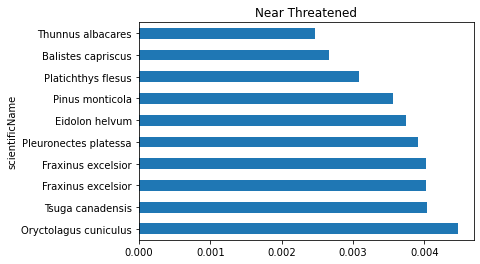

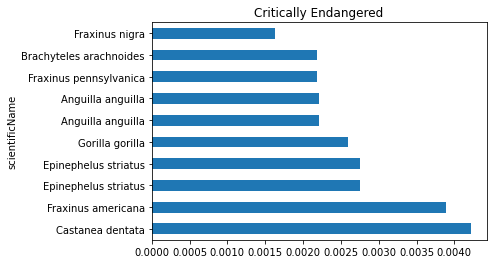

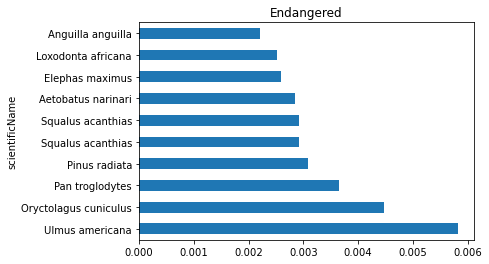

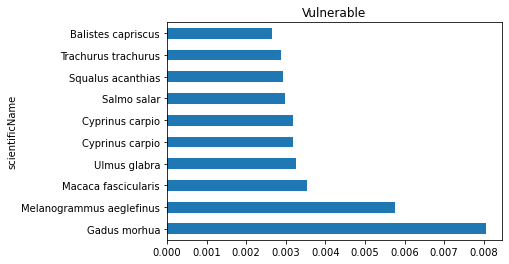

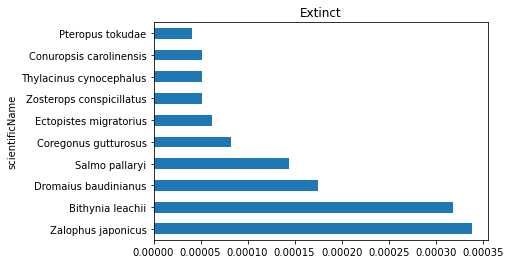

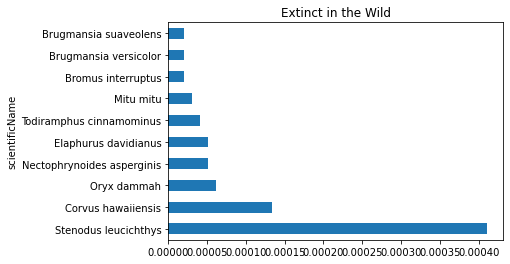

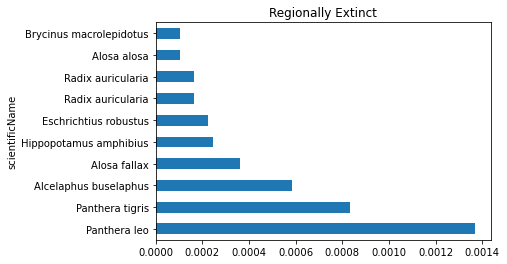

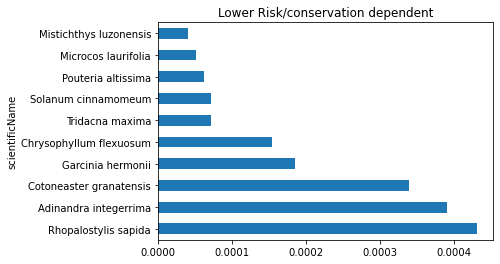

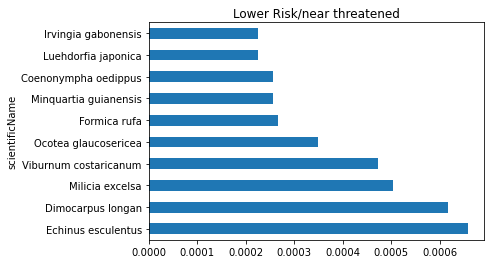

In [4]:
degree_df = pd.DataFrame.from_dict(nx.degree_centrality(G), orient='index', columns=['degree'])
degree_df = redlist_df.join(degree_df, on='scientificName').set_index('scientificName')

for category in degree_df.redlistCategory.unique():
    plt.figure()
    degree_df.query(f"redlistCategory == '{category}'").sort_values(by='degree', ascending=False)[:10].degree.plot.barh(title= f"{category}")

Para ter uma ideia mais clara da influência do grau de centralidade no nível de ameaça sofrida por uma espécie, foi calculada a correlação entre ambas as características. Para conseguir fazer esse cálculo, o primeiro passo foi converter as categorias para um valor capaz de indicar o nível de risco para aquela categoria. Assim, foram atribuidos valores de 0 até 8, onde quanto maior o valor, maior o risco enfrentado pela espécie. Como mostra o resultado abaixo, a correlação entre o grau e o risco é muito baixa.

In [5]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

degree_df.redlistCategory = degree_df.redlistCategory.replace(risk_levels)
degree_df[['redlistCategory', 'degree']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,degree
redlistCategory,1.000000,-0.029102
degree,-0.029102,1.000000


### Page Rank

Nesse ponto, foi utilizada a métrica de page rank como forma de medir a influência de uma determinada espécie no grafo de interações. Mais uma vez não foi possível observar um padrão claro de comportamento ao se observar diretamente a distribuição para cada uma das categorias. Por outro lado, comparado ao cenário anterior, os líderes para cada uma das categorias parecem estar em posição mais isolada em relação aos demais.

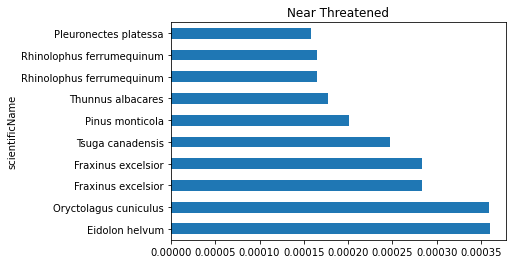

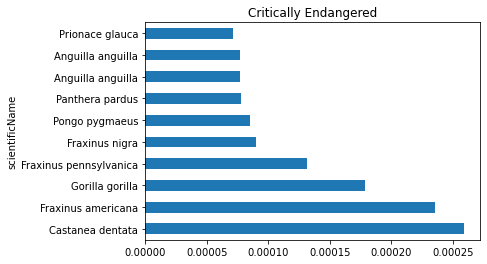

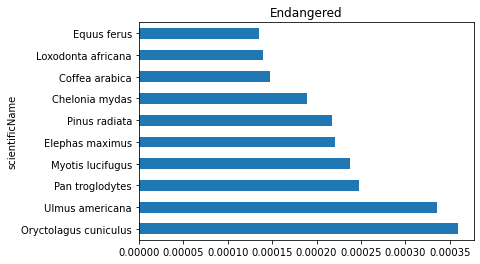

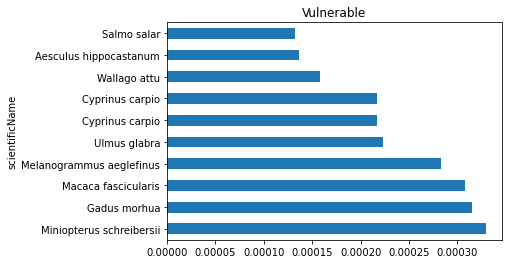

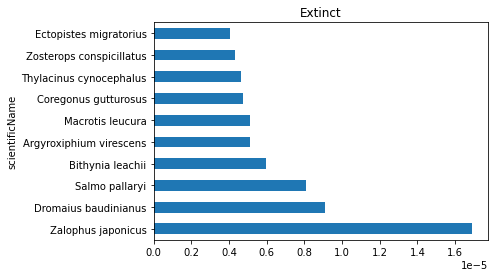

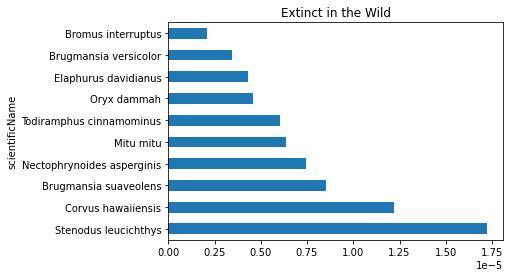

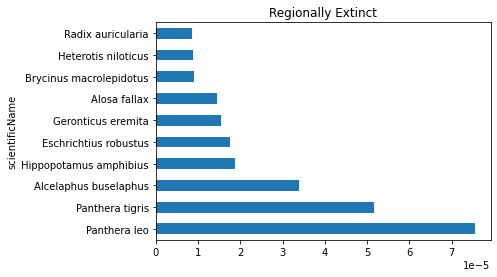

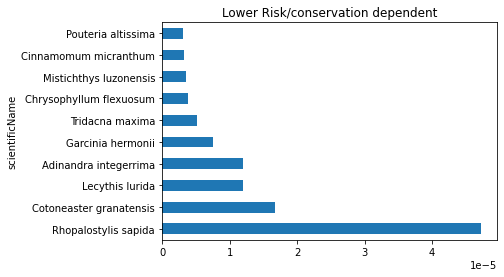

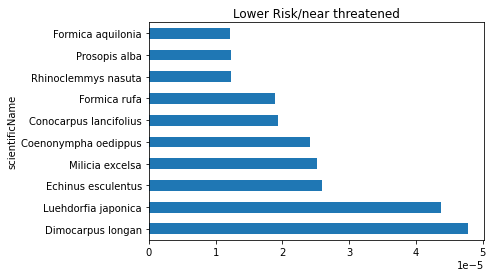

In [6]:
pagerank_df = pd.DataFrame.from_dict(nx.pagerank(G), orient='index', columns=['pagerank'])
pagerank_df = redlist_df.join(pagerank_df, on='scientificName').set_index('scientificName')

for category in pagerank_df.redlistCategory.unique():
    plt.figure()
    pagerank_df.query(f"redlistCategory == '{category}'").sort_values(by='pagerank', ascending=False)[:10].pagerank.plot.barh(title= f"{category}")

Avaliando as correlações mais uma vez, pode-se constatar o que já havia sido observado anteriormente: não há uma correlação entre as categorias e a influência calculada pelo page rank. Apesar da correlação ser maior do que a calculada para o grau, o valor resultante ainda é consideravelmente baixo.

In [7]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

pagerank_df.redlistCategory = pagerank_df.redlistCategory.replace(risk_levels)
pagerank_df[['redlistCategory', 'pagerank']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,pagerank
redlistCategory,1.000000,-0.031947
pagerank,-0.031947,1.000000


## Centralidade de autovetor

Por fim, foi testada a métrica de centralidade de autovetor, onde mais uma vez não é possível enxergar um padrão observando diretamente nas categorias. Como ponto de curiosidade, fica o fato da centralidade de espécies extintas ser inferior se comparadas às demais espécies. Já entre os criticamente em perigo, destaca-se a espécie `Brachyteles arachnoides`, também conhecido como Muriqui-do-sul, uma espécie de macaco encontrado na mata atlântica brasileira (entre Paraná, São Paulo, Minas Gerais, Rio de Janeiro e Espírito Santo). Um valor tão alto indica que a espécie apresenta uma grande importância em termos de interação, e o fato de ser uma espécie em situação tão crítica pode indicar que ela é uma forte candidata a ser uma espécie na qual é necessário se concentrar esforços de conservação em vista a proteger o maior número de espécies possível.

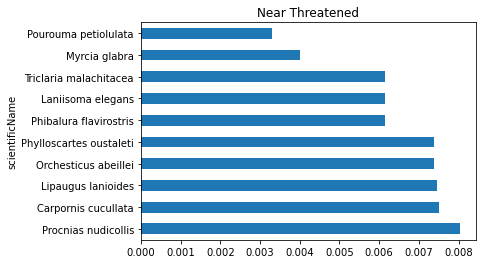

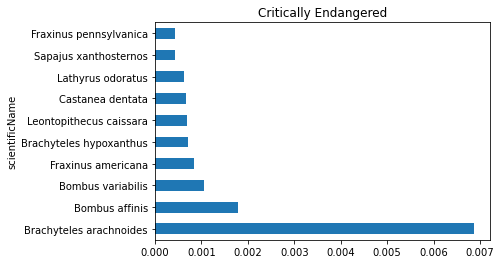

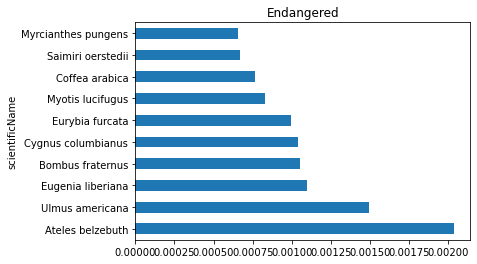

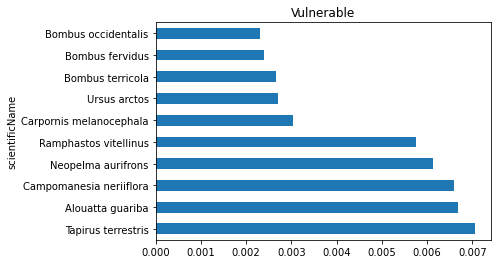

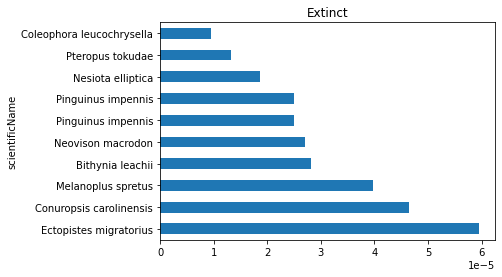

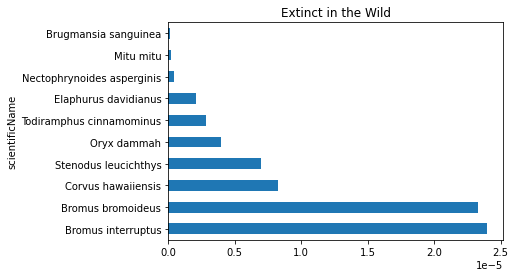

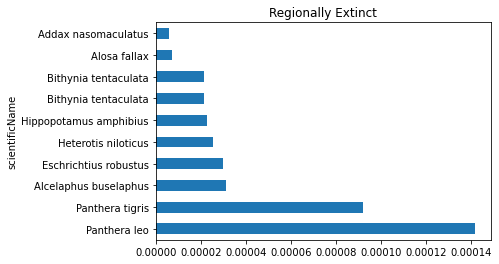

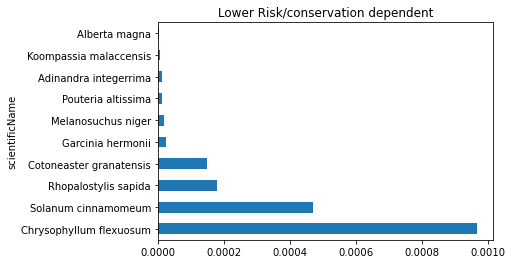

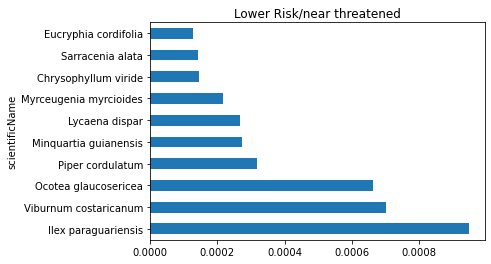

In [8]:
eigenvector_centrality_df = pd.DataFrame.from_dict(nx.eigenvector_centrality(G), orient='index', columns=['eigenvector_centrality'])
eigenvector_centrality_df = redlist_df.join(eigenvector_centrality_df, on='scientificName').set_index('scientificName')

for category in eigenvector_centrality_df.redlistCategory.unique():
    plt.figure()
    eigenvector_centrality_df.query(f"redlistCategory == '{category}'").sort_values(by='eigenvector_centrality', ascending=False)[:10].eigenvector_centrality.plot.barh(title= f"{category}")

Já observando a correlação, fica claro mais uma vez que essa métrica não possui influência no risco enfrentado por uma espécie.

In [9]:
risk_levels = {
    'Lower Risk/conservation dependent': 0, 
    'Lower Risk/near threatened': 1,
    'Near Threatened': 2,
    'Vulnerable': 3,
    'Endangered': 4,
    'Critically Endangered': 5,
    'Regionally Extinct': 6,
    'Extinct in the Wild': 7,
    'Extinct': 8
}

eigenvector_centrality_df.redlistCategory = eigenvector_centrality_df.redlistCategory.replace(risk_levels)
eigenvector_centrality_df[['redlistCategory', 'eigenvector_centrality']].corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,eigenvector_centrality
redlistCategory,1.000000,-0.057960
eigenvector_centrality,-0.057960,1.000000


In [10]:
metrics_df = eigenvector_centrality_df[['redlistCategory', 'eigenvector_centrality']].copy()
metrics_df['pagerank'] = pagerank_df['pagerank']
metrics_df['degree_centrality'] = degree_df['degree']
metrics_df = metrics_df.dropna(subset=['pagerank'])
metrics_df
metrics_df.corr().style.background_gradient(cmap='coolwarm')

,redlistCategory,eigenvector_centrality,pagerank,degree_centrality
redlistCategory,1.000000,-0.057960,-0.031947,-0.029102
eigenvector_centrality,-0.057960,1.000000,0.178780,0.324605
pagerank,-0.031947,0.178780,1.000000,0.886974
degree_centrality,-0.029102,0.324605,0.886974,1.000000


## Clusterização

Para analisar os efeitos da clusterização, foi utilizado o software `Gephi`. Para facilitar essa computação, o grafo foi limitado somente às interações onde uma espécie se alimenta da outra, em uma rede de interações mais próxima do que é observado em uma cadeia alimentar. Neste grafo, foi aplicado o algoritmo de Leiden para identificar os clusters de interações, onde o resultado pode ser visto no arquivo `04 - Pesquisa/imagens/interaction-eats.pdf`. O algoritmo de Girvan-Newman foi testado, porém, apesar de ser mais famoso, a carga computacional para um grafo desse tamanho impossibilitou os testes.

In [11]:
gephi_metrics_df = pd.read_csv('interaction-eats-clusters-hits-prestige.csv').set_index('Id')
gephi_metrics_df

,Label,timeset,Cluster,pageranks,Authority,Hub,pr_indegree,pr_indegree_normalized,pr_domain,pr_proximity,pr_rank,pr_rank_min-max-normalized
Id,,,,,,,,,,,,
Trigona laeviceps,Trigona laeviceps,NaN,0,0.000014,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
Homo sapiens,Homo sapiens,NaN,0,0.001189,0.000030,0.000663,134,0.002775,0.032575,0.003452,0.001869,0.174882
Lisotrigona cacciae,Lisotrigona cacciae,NaN,0,0.000014,0.000000,0.000001,0,0.000000,0.000000,0.000000,0.000000,0.000000
Canis lupus,Canis lupus,NaN,0,0.000118,0.000048,0.000038,31,0.000642,0.032575,0.003484,0.001632,0.152714
Lisotrigona furva,Lisotrigona furva,NaN,0,0.000014,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
Mouse sapelovirus M-58/USA/2008,Mouse sapelovirus M-58/USA/2008,NaN,1,0.000014,0.000000,0.000000,1,0.000021,0.000021,0.000021,0.000014,0.001286
Tembusu virus,Tembusu virus,NaN,1,0.000015,0.000000,0.000000,2,0.000041,0.032596,0.005907,0.000096,0.008987
Paratrytone melane,Paratrytone melane,NaN,0,0.000014,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000


Como pode ser visto na figura citada, as espécies foram divididas basicamente em dois grupos. Foram encontrados alguns clusters menores, porém a maioria contava com apenas 2 espécies, com alguns poucos grupos apresentando 4 espécies. O gráfico abaixo apresenta essa distribuição, onde os grupos 0 e 1 cobrem pouco mais de 93% das espécies contidas no grafo.

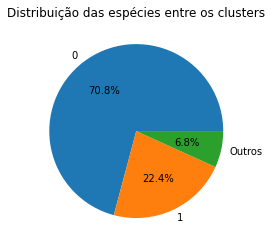

In [12]:
def pie_plot_others(title, series, agg_after):
    others_row = pd.Series({'Outros': series[agg_after:].sum()})
    plot_df = pd.concat([series[:agg_after], others_row])
    plot_df.plot.pie(title=title, autopct='%1.1f%%', ylabel='')    

pie_plot_others("Distribuição das espécies entre os clusters", gephi_metrics_df.Cluster.value_counts(), 2)

A seguir, foi analisado se os agrupamentos encontrados apresentam alguma relação com o risco de extinção enfrentado por uma determinada espécie. No entanto, como mostram os gráficos abaixo, a distribuição das categorias entre os dois principais agrupamentos encontrados foi muito semelhante. Além disso, não é possível observar nenhuma liderança clara para uma determinada categoria dentro dos grupos.

In [13]:
clusters_df = redlist_df.join(gephi_metrics_df['Cluster'], on='scientificName')
clusters_df

,Unnamed: 0,scientificName,redlistCategory,populationTrend,systems,realm,possiblyExtinct,possiblyExtinctInTheWild,longitude,latitude,Cluster
0,0,Hexanchus griseus,Near Threatened,Decreasing,Marine,NaN,False,False,NaN,NaN,1.0
1,1,Heosemys annandalii,Critically Endangered,Decreasing,Terrestrial|Freshwater (=Inland waters),Indomalayan,False,False,NaN,NaN,NaN
2,2,Hubbsina turneri,Critically Endangered,Decreasing,Freshwater (=Inland waters),Neotropical,False,False,"[-101.4795, -101.7773, -101.7876]","[19.8745, 19.8256, 19.8273]",NaN
3,3,Hungerfordia pelewensis,Endangered,Unknown,Terrestrial,Oceanian,False,False,NaN,NaN,NaN
4,4,Ictalurus mexicanus,Vulnerable,Unknown,Freshwater (=Inland waters),Neotropical,False,False,"[-99.35417, -99.3]","[21.98083, 22.0]",NaN
...,...,...,...,...,...,...,...,...,...,...,...
50245,50245,Filicium thouarsianum,Near Threatened,Decreasing,Terrestrial,Afrotropical,False,False,"[49.13333, 49.066667, 49.13333, 49.13333, 47.7...","[-18.81666, -18.866667, -18.81666, -18.81666, ...",NaN
50246,50246,Melanophylla angustior,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[47.72611, 47.7322]","[-23.01306, -23.0219]",NaN
50247,50247,Melanophylla madagascariensis,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.2001111, 49.20305, 49.20333, 49.20388, 49....","[-17.9206389, -17.93194, -17.93194, -17.92944,...",NaN
50248,50248,Melanophylla modestei,Endangered,Decreasing,Terrestrial,Afrotropical,False,False,"[49.98333, 49.975, 49.975, 49.96666, 49.966667...","[-15.63333, -15.625, -15.625, -15.63333, -15.6...",NaN


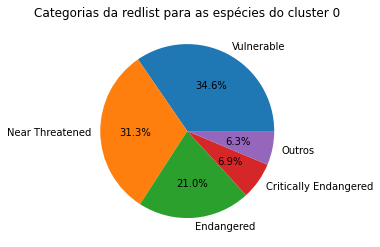

In [14]:
pie_plot_others("Categorias da redlist para as espécies do cluster 0", clusters_df.query("Cluster == 0")['redlistCategory'].value_counts(), 4)

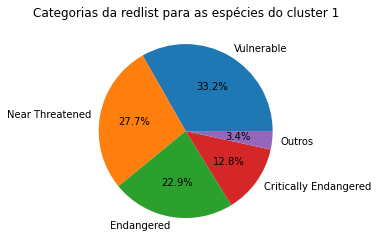

In [15]:
pie_plot_others("Categorias da redlist para as espécies do cluster 1", clusters_df.query("Cluster == 1")['redlistCategory'].value_counts(), 4)

Aproveitando os agrupamentos obtidos, foi verificado se as espécies que fazem parte de um mesmo agrupamento também compartilham tendências semelhantes de crescimento. Como mostram os gráficos abaixo, há uma parcela maior de espécies em situação desconhecida para o agrupamento 1, enquanto para o agrupamento 0 há uma quantidade maior de espécies com a população em queda.

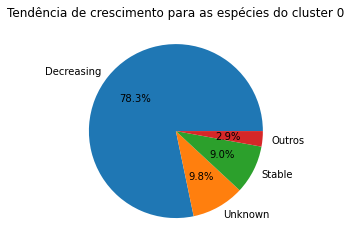

In [16]:
pie_plot_others("Tendência de crescimento para as espécies do cluster 0", clusters_df.query("Cluster == 0")['populationTrend'].value_counts(), 3)

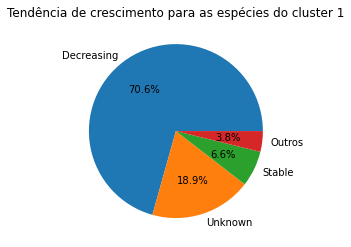

In [17]:
pie_plot_others("Tendência de crescimento para as espécies do cluster 1", clusters_df.query("Cluster == 1")['populationTrend'].value_counts(), 3)

Ainda considerando os agrupamentos obtidos, foi observado se há um padrão na localização geográfica entre os dois principais agrupamentos observados. Para o agrupamento 0, é possível perceber que há espécies espalhadas por diversas regiões do mundo. No entanto, para o agrupamento 1 há uma surpresa, as espécies se concentram em 3 diferentes regiões. A primeira delas fica no México, espalhadas entre a Cidade do México e Cancún. A segunda fica localizada na África, separada entre os países de Uganda e Malawi. Por fim, a terceira fica localizada na Indonésia. Entre essas três regiões, o que há de comum é uma faixa mais central de latitude, o que pode indicar uma influência do clima mais quente encontrada nessa faixa do mundo.

In [18]:
import folium
from folium.plugins import HeatMap

map = folium.Map()

points = []
for _, row in clusters_df.query("Cluster == 0").dropna(subset=['latitude', 'longitude']).iterrows():
    for lat, long in zip(eval(row['latitude']), eval(row['longitude'])):
        points.append([lat, long])

HeatMap(points).add_to(map)
map

In [19]:
map = folium.Map()

points = []
for _, row in clusters_df.query("Cluster == 1").dropna(subset=['latitude', 'longitude']).iterrows():
    for lat, long in zip(eval(row['latitude']), eval(row['longitude'])):
        points.append([lat, long])

HeatMap(points).add_to(map)
map

## Reinos animais em cada grupo

Voltando à composição dos dois principais grupos identificados, a próxima análise consiste em identificar quais são os reinos animais mais presentes em cada uma das divisões. Para isso, o primeiro passo é criar um data frame que apresente tanto o reino de uma espécie quanto o grupo do qual ela faz parte.

In [20]:
kingdom_df = pd.DataFrame()
kingdom_df['speciesName'] = pd.concat([interactions_df['sourceTaxonSpeciesName'], interactions_df['targetTaxonSpeciesName']])
kingdom_df['kingdom'] = pd.concat([interactions_df['sourceTaxonKingdomName'], interactions_df['targetTaxonKingdomName']])
kingdom_df = kingdom_df.drop_duplicates(keep='first')

kingdom_df

,speciesName,kingdom
0,Andrena milwaukeensis,Animalia
1,Andrena mandibularis,Animalia
2,Andrena edwardsi,Animalia
5,Andrena tridens,Animalia
6,Andrena carolina,Animalia
...,...,...
922284,Cod iridovirus/15/04.11.92/DNK,Bamfordvirae
922295,Halibut betanodavirus V9954,Orthornavirae
922510,Asian Narcissus potyvirus,Orthornavirae
922524,Zophiuma butawengi,Animalia


In [21]:
kingdom_df = kingdom_df.join(gephi_metrics_df['Cluster'], on='speciesName')
kingdom_df

,speciesName,kingdom,Cluster
0,Andrena milwaukeensis,Animalia,0.0
1,Andrena mandibularis,Animalia,NaN
2,Andrena edwardsi,Animalia,NaN
5,Andrena tridens,Animalia,NaN
6,Andrena carolina,Animalia,NaN
...,...,...,...
922284,Cod iridovirus/15/04.11.92/DNK,Bamfordvirae,1.0
922295,Halibut betanodavirus V9954,Orthornavirae,NaN
922510,Asian Narcissus potyvirus,Orthornavirae,NaN
922524,Zophiuma butawengi,Animalia,NaN


O resultado, como mostram os gráficos abaixos, é que ambos os grupos são compostos majoritariamente por espécies do reino Animalia. No entanto, para o caso do grupo 1 a quantidade de espécies do reino Animalia está muito acima da média. Já para o caso do grupo 0, é possível perceber uma concentração maior de espécies do reino Plantae, também muito superior ao observado na média. Já para o caso dos dois grupos, percebe-se também uma quantidade baixa de espécies do reino Fungi, o qual é o segundo reino com mais espécies no grafo de interações de alimentação. No entanto, ao se observar os demais agrupamentos, é possível perceber que a distribuição dos principais reinos segue bem de perto o que é observado na média, apesar de uma pequena queda na quantidade de espécies do reino Animalia e um aumento para o reino Fungi, causado principalmente pela concentração de espécies do animalia nos dois principais clusters.

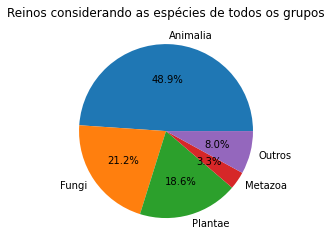

In [22]:
pie_plot_others("Reinos considerando as espécies de todos os grupos", kingdom_df.kingdom.value_counts(), 4)

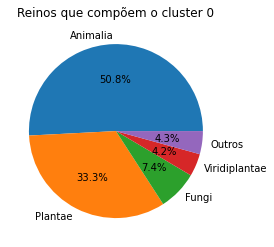

In [23]:
pie_plot_others("Reinos que compõem o cluster 0", kingdom_df.query("Cluster == 0").kingdom.value_counts(), 4)

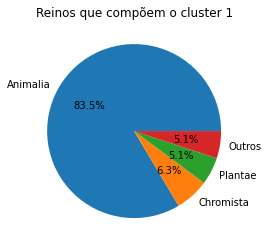

In [24]:
pie_plot_others("Reinos que compõem o cluster 1", kingdom_df.query("Cluster == 1").kingdom.value_counts(), 3)

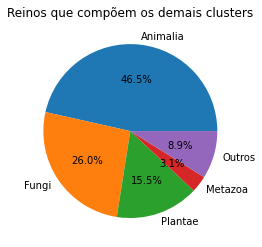

In [25]:
pie_plot_others("Reinos que compõem os demais clusters", kingdom_df.query("Cluster != 0 and Cluster != 1").kingdom.value_counts(), 4)

## Page Rank

Nesse ponto foi utilizada a métrica de Page Rank para identificar a influência das espécies que compõem cada um dos grupos. A ideia era verificar as espécies mais proeminentes em uma tentativa de identificar as espécies que causariam o maior impacto caso fossem extintas. Como mostram os gráficos abaixo, para ambos os grupos uma espécie se destaca das demais dentro dessa métrica. Para o grupo 0, a espécie em destaque é a `Pinus Sylvestris`, uma espécie de pinheiro encontrado na América do Norte. Já para o caso do grupo 1, a espécie de maior destaque é a `diatom ORGANIC-3`, uma espécie de alga.

<AxesSubplot:title={'center':'Page Rank das espécies do cluster 0'}, ylabel='Id'>

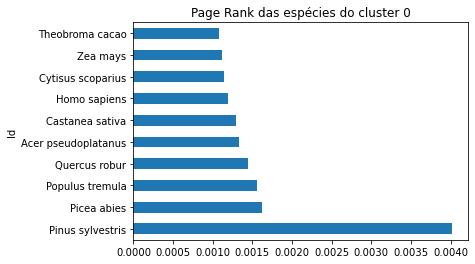

In [26]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='pageranks', ascending=False)[:10].pageranks.plot.barh(title='Page Rank das espécies do cluster 0')

<AxesSubplot:title={'center':'Page Rank das espécies do cluster 1'}, ylabel='Id'>

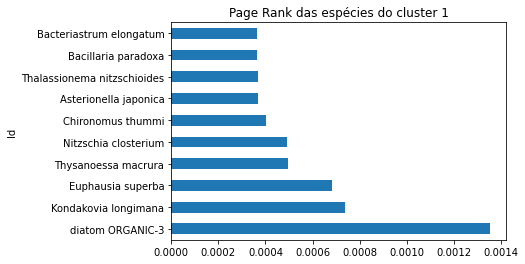

In [27]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='pageranks', ascending=False)[:10].pageranks.plot.barh(title='Page Rank das espécies do cluster 1')

## Indegree Prestige

Já para essa análise, foi avaliada a influência de uma espécie por meio da métrica Indegree Prestige. Essa métrica computa a quantidade de nós que apontam para um determinado nó, ou seja, no caso específico que está sendo trabalhado ela indicará quantas espécies se alimentam diretamente de uma determinada espécie. Como mostram os gráficos abaixo, para o grupo 0, o `Pinus Sylvestris` volta a se destacar, o que indica que a influência observada anteriormente para ele se dá pelo fato dessa espécie servir de alimento para uma grande quantidade de outras espécies, sendo assim parte fundamental para a manutenção do grupo.

Para o caso do grupo 1, há um a variação menor entre o prestígio das espécies, porém três delas se destacam no topo. A primeira é a `Nitzschia Closterium`, um tipo de alga unicelular (diatomácea), assim como o `diatom ORGANIC-3` que se mostrou influente anteriormente. O segundo é a `Kondakovia Longimana`, uma espécie de lula encontrada no hemisfério sul. A terceira é a `Paracalanus Parvus`, uma espécie de crustáceo de dimensões milimétricas. Curiosamente, todas as três espécies com maior prestígio desse grupo, assim como a espécie mais influente, são encontrados nos oceanos, o que pode indicar que esse grupo é composto por espécies aquáticas enquanto o grupo 0 é composto por animais terrestres.

<AxesSubplot:title={'center':'Indegree Prestige das espécies do cluster 0'}, ylabel='Id'>

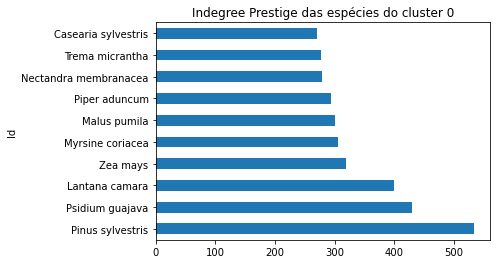

In [28]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='pr_indegree', ascending=False)[:10].pr_indegree.plot.barh(title='Indegree Prestige das espécies do cluster 0')

<AxesSubplot:title={'center':'Indegree Prestige das espécies do cluster 1'}, ylabel='Id'>

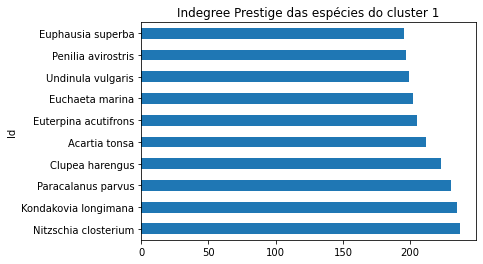

In [29]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='pr_indegree', ascending=False)[:10].pr_indegree.plot.barh(title='Indegree Prestige das espécies do cluster 1')

## Prestige Domain

Já para esse caso, foi utilizada uma métrica que expande a utilizada na análise anterior. O Prestige Domain considera todos os nós que apontam direta ou indiretamente para um determinado nó. Assim, no caso do cenário estudado, essa métrica mostra o alcance dessa espécie dentro da cadeia alimentar, considerando as espécies que se alimentam das espécies que se alimentam dessa espécie, e assim por diante.

Para essa métrica, nenhuma espécie se destaca dentro do grupo 0, mostrando um certo equilíbrio dentro da cadeia alimentar. Entre as primeiras espécies que compõem este ranking estão a `Zea Mays`, uma espécie de milho,  a `Taraxacum Officinale`, também conhecida como dente-de-leão, e a `Lantana Camara`, conhecido como cambará. Entre essas espécies há o fato em comum de serem plantas, assim como o pinheiro que se destacou anteriormente.

Para o grupo 1, voltaram a se destacar a `Nitzschia Closterium` e a `diatom ORGANIC-3`, onde ambas são espécies diferentes de algas unicelulares. O ponto interessante é a volta do `diatom ORGANIC-3` ao topo do ranking, o que indica que a influência dele identificada anteriormente ocorre porque há uma grande quantidade de espécies que se alimentam das espécies que se alimentam dela, e assim por diante.

<AxesSubplot:title={'center':'Domain Prestige das espécies do cluster 0'}, ylabel='Id'>

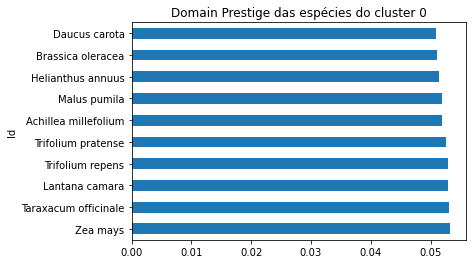

In [30]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='pr_domain', ascending=False)[:10].pr_domain.plot.barh(title='Domain Prestige das espécies do cluster 0')

<AxesSubplot:title={'center':'Domain Prestige das espécies do cluster 1'}, ylabel='Id'>

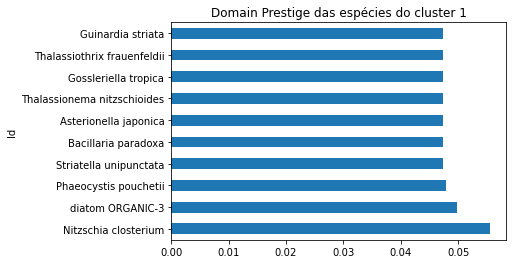

In [31]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='pr_domain', ascending=False)[:10].pr_domain.plot.barh(title='Domain Prestige das espécies do cluster 1')

## Proximity Prestige

Para essa análise foi utilizada a métrica Proximity Prestige. A diferença desse prestígio para os demais é que, apesar de considerar nós que apontam direta ou indiretamente assim como a Domain Prestige, ela considera pesos baseados na distância do caminho entre os nós que apontam para o nó que está sendo analisado. Assim, quanto mais longe, menor a influência.

Para o grupo 0, a `Lantana Camara` voltou a se destacar, seguida de perto pela `Prunus spinosa`, um tipo de ameixa, e a `Crataegus Monogyna`, um tipo de planta conhecida como pilriteiro. Mais uma vez, a maior fonte de alimentos no grupo 0 são plantas, o que reforça a ideia de separação do grupo 0 sendo as espécies terrestres e o grupo 1 sendo as espécies marinhas.

Para o grupo 1, voltaram a se destacar as algas unicelulares.

<AxesSubplot:title={'center':'Proximity Prestige das espécies do cluster 0'}, ylabel='Id'>

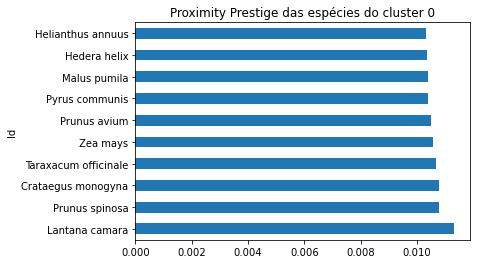

In [32]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='pr_proximity', ascending=False)[:10].pr_proximity.plot.barh(title='Proximity Prestige das espécies do cluster 0')

<AxesSubplot:title={'center':'Proximity Prestige das espécies do cluster 1'}, ylabel='Id'>

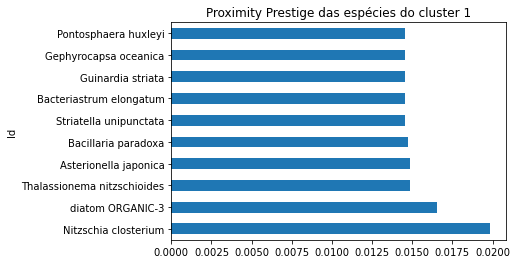

In [33]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='pr_proximity', ascending=False)[:10].pr_proximity.plot.barh(title='Proximity Prestige das espécies do cluster 1')

## Rank Prestige

A métrica utilizada nessa análise considera somente os nós que apontam diretamente para o nó analisado, assim como o Indregree Prestige. No entanto, para essa métrica considera-se um peso para cada nó. O peso utilizado foi o pagerank.

Para o grupo 0, voltaram a se destacar as espécies `Pinus Sylvestris` e `Lantana Camara`, com a `Psidium Guajava`, uma espécie de goiabeira.

Já para o grupo 1, o primeiro lugar disparado volta a ficar com a `Nitszchia Closterium`.

<AxesSubplot:title={'center':'Rank Prestige das espécies do cluster 0'}, ylabel='Id'>

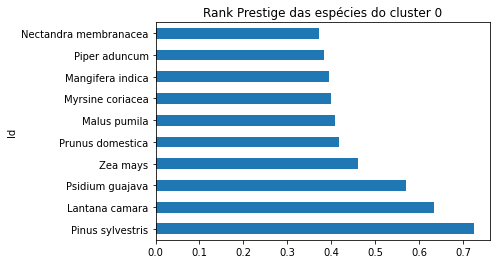

In [34]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='pr_rank_min-max-normalized', ascending=False)[:10]['pr_rank_min-max-normalized'].plot.barh(title='Rank Prestige das espécies do cluster 0')

<AxesSubplot:title={'center':'Rank Prestige das espécies do cluster 1'}, ylabel='Id'>

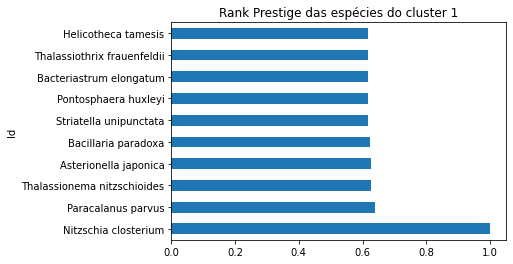

In [35]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='pr_rank_min-max-normalized', ascending=False)[:10]['pr_rank_min-max-normalized'].plot.barh(title='Rank Prestige das espécies do cluster 1')

## Authority nos clusters encontrados

Para essa análise, foi computada a authority para os nós nos dois maiores clusters identificados anteriormente. Essa métrica é parte do [HITS](https://github.com/gephi/gephi/wiki/HITS), uma métrica para avaliar páginas web. A authority é o valor do conteúdo da página web, o que pode ser traduzido para o problema atual como a importância do animal dentro da rede de interações. Como mostram os gráficos abaixo, as espécies do grupo 0 aparentam ter níveis maiores de authority, porém todos estão em um intervalo próximo de valores, com a `Nectandra membranacea`, uma espécie de árvore encontrada na América Latina, se destacando. Já no grupo 1, os níveis de authority são menores, porém, a `Trigla lyra` (uma espécie de peixe que pode ser encontrada na região do mar mediterrâneo) é o grande destaque deste cluster, com um valor de authority mais de 5 vezes maior que a segunda espécie da lista.

<AxesSubplot:title={'center':'Authority das espécies do cluster 0'}, ylabel='Id'>

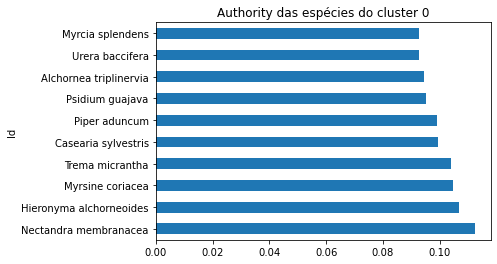

In [36]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='Authority', ascending=False)[:10].Authority.plot.barh(title='Authority das espécies do cluster 0')

<AxesSubplot:title={'center':'Authority das espécies do cluster 1'}, ylabel='Id'>

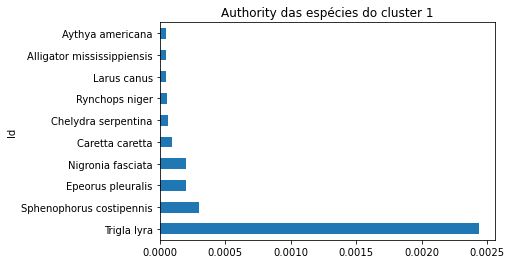

In [37]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='Authority', ascending=False)[:10].Authority.plot.barh(title='Authority das espécies do cluster 1')

## Hub nos clusters encontrados

O Hub é uma outra métrica parte do HITS, onde dessa vez é estimado a importância de um link saído de uma página web para outra. Assim, para o caso que está sendo analisado, essa métrica poderia ser interpretada como a importância de uma espécie se alimentar de outras. Para essa métrica, pode ser observado um comportamento muito semelhante ao observado para a authority. No grupo 0 as espécies tendem a apresentar valores maiores sem uma diferença drástica entre as espécies, enquanto para o grupo 1 os valores encontrados são menores com uma espécie se destacando no primeiro lugar. Para o caso do grupo 0, entre as espécies que se destacam estão a `Dacnis cayana`, uma espécie de pássaro encontrada na América do Sul, a `Tyrannus melancholicus`, uma outra espécie de pássaro que pode ser encontrada em toda a América, e a `Myiodinastes maculatus`, uma espécie de pássaro encontrada também na América Latina. Curiosamente, as três espécies de maior destaque são pássaros que se encontram em uma mesma região do mundo **[JUSTIFICAR ISSO]**. Já para o cluster 1, as espécies de destaque são a `Threskiornis aethiopicus`, uma espécie de ave que pode ser encontrada na África e no Oriente Médio (também conhecido como Íbis-sagrado).

<AxesSubplot:title={'center':'Hub das espécies do cluster 0'}, ylabel='Id'>

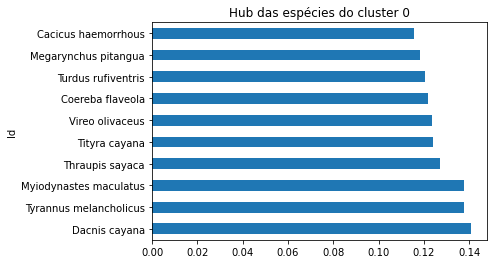

In [38]:
gephi_metrics_df.query("Cluster == 0").sort_values(by='Hub', ascending=False)[:10].Hub.plot.barh(title='Hub das espécies do cluster 0')

<AxesSubplot:title={'center':'Hub das espécies do cluster 1'}, ylabel='Id'>

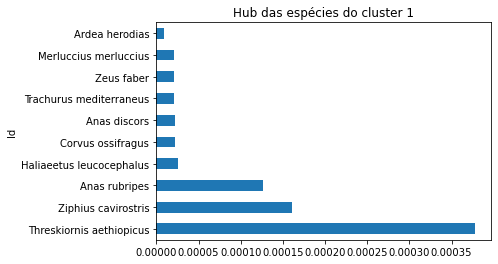

In [39]:
gephi_metrics_df.query("Cluster == 1").sort_values(by='Hub', ascending=False)[:10].Hub.plot.barh(title='Hub das espécies do cluster 1')

## Vulnerabilidade

Impacto na eficiência global quando um nó é retirado. Definido por:

$$
V_i = \frac{E - E_i}{E} \\
E = \frac{1}{N (N - 1)} \sum_{i \ne j} \frac{1}{d_{ij}},
$$

onde $V_i$ representa a vulnerabilidade de um nó $i$, $E$ representa a eficiência global e $E_i$ representa a eficiência global quando o nó $i$ é removido.

In [40]:
target_category_df = interactions_df.join(redlist_df.set_index('scientificName')['redlistCategory'], on='targetTaxonSpeciesName')
g1_df = target_category_df.query("interactionTypeName == 'eats'")

G1 = nx.DiGraph()
G1 = nx.from_pandas_edgelist(target_category_df[['sourceTaxonSpeciesName', 'targetTaxonSpeciesName']], 'sourceTaxonSpeciesName', 'targetTaxonSpeciesName')

# G1 = nx.DiGraph(G) # Define o grafo como um grafo direcionado

len(list(G1.nodes()))

194636

In [41]:
nodes_to_remove = clusters_df.query("Cluster != 0 and Cluster != 1").scientificName.values
G1.remove_nodes_from(nodes_to_remove)

len(list(G1.nodes()))

191973

In [ ]:
nx.algorithms.efficiency_measures.local_efficiency(G1)

In [ ]:
from tqdm import tqdm

def my_global_efficiency(G):
    '''author Joel C Miller
       https://stackoverflow.com/a/57032282/2966723
    '''

    n = len(G)
    denom = n*(n-1)
    if denom>0:
        efficiency = 0
        for path_collection in tqdm(nx.all_pairs_shortest_path_length(G)):
            source = path_collection[0]
            for target in path_collection[1]:
                if target != source:
                    efficiency += 1./path_collection[1][target]    
        return efficiency/denom
    else:
        return 0

my_global_efficiency(G1)